<a href="https://colab.research.google.com/github/MRazin172/Employee/blob/main/Employee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
emp=pd.read_csv('/content/employee_data (1) 2.csv')

In [3]:
emp.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,221,engineering,NaN,0.932868,4,NaN,low,0.829896,Left,5.0
1,232,support,NaN,NaN,3,NaN,low,0.834544,Employed,2.0
2,184,sales,NaN,0.788830,3,NaN,medium,0.834988,Employed,3.0
3,206,sales,NaN,0.575688,4,NaN,low,0.424764,Employed,2.0
4,249,sales,NaN,0.845217,3,NaN,low,0.779043,Employed,3.0


In [4]:
emp.isnull().sum()

avg_monthly_hrs          0
department             709
filed_complaint      12191
last_evaluation       1532
n_projects               0
recently_promoted    13949
salary                   0
satisfaction           181
status                   0
tenure                 181
dtype: int64

In [5]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [6]:
emp['filed_complaint']=emp['filed_complaint'].fillna(0)

In [7]:
emp['filed_complaint']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
14244    0.0
14245    0.0
14246    1.0
14247    0.0
14248    0.0
Name: filed_complaint, Length: 14249, dtype: float64

In [8]:
emp['recently_promoted']=emp['recently_promoted'].fillna(0)

In [9]:
emp.dtypes

avg_monthly_hrs        int64
department            object
filed_complaint      float64
last_evaluation      float64
n_projects             int64
recently_promoted    float64
salary                object
satisfaction         float64
status                object
tenure               float64
dtype: object

In [10]:
def num(emp):
    num_var = []
    for col in emp.columns:
        if emp[col].dtype == "float64":
            num_var.append(col)
    return num_var


nv = num(emp)


for col in nv:
    mean = emp[col].mean()
    emp[col].fillna(mean, inplace=True)

emp.isnull().sum()

avg_monthly_hrs        0
department           709
filed_complaint        0
last_evaluation        0
n_projects             0
recently_promoted      0
salary                 0
satisfaction           0
status                 0
tenure                 0
dtype: int64

In [11]:
emp.dropna(subset=['department'],inplace=True)

In [12]:
emp.shape

(13540, 10)

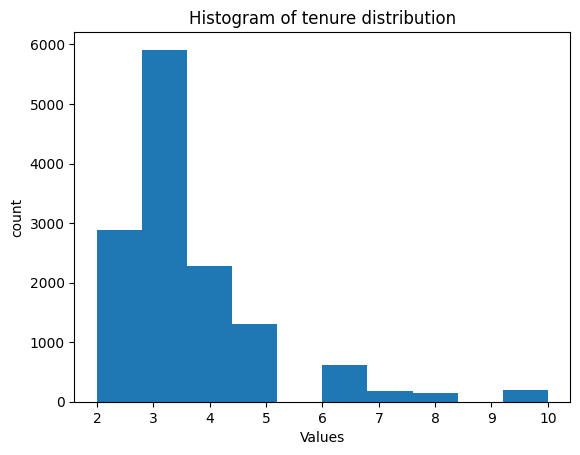

In [13]:
# Create a histogram for both columns
plt.hist(emp['tenure'])
plt.xlabel('Values')
plt.ylabel('count')
plt.title('Histogram of tenure distribution')
plt.show() #most people are leaving after 3-4 years with the company, no retention

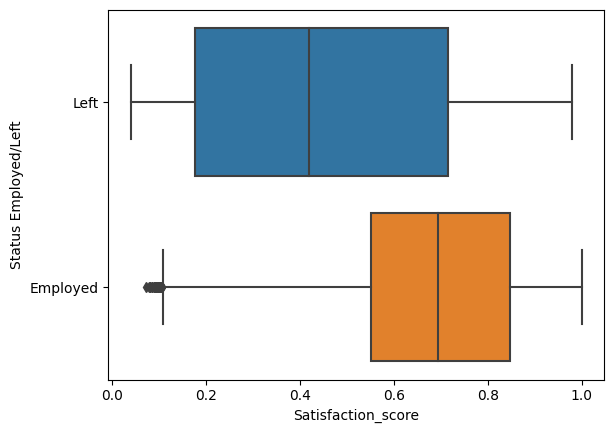

In [14]:
import seaborn as sns
sns.boxplot(data=emp, x='satisfaction', y='status')
plt.xlabel('Satisfaction_score')
plt.ylabel('Status Employed/Left')
plt.show()

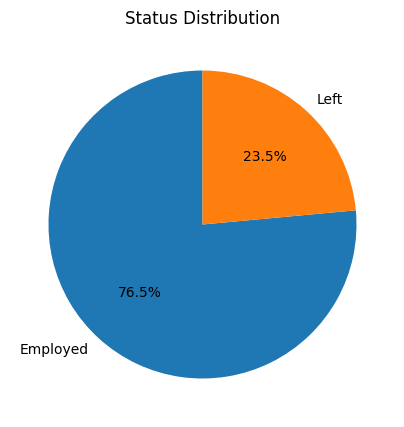

In [15]:
Status_count = emp['status'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(Status_count, labels=Status_count.index, autopct='%1.1f%%', startangle=90)
plt.title("Status Distribution")
plt.show()

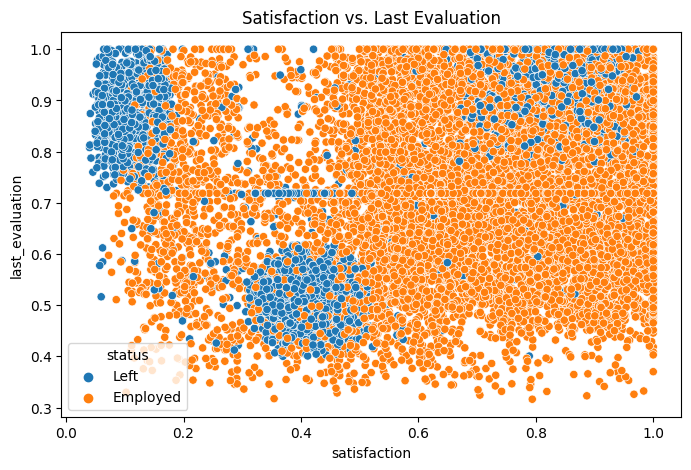

In [16]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=emp, x='satisfaction', y='last_evaluation', hue='status')
plt.title("Satisfaction vs. Last Evaluation")
plt.show()

In [17]:
# 2. Decision Tree Modeling
from sklearn.model_selection import train_test_split
# Split the dataset into a training set and a testing set
X = emp[['tenure', 'satisfaction', 'n_projects']]
y = emp['status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
from sklearn.tree import DecisionTreeClassifier,export_graphviz, plot_tree
# Build a decision tree classifier using Gini impurity
tree_gini = DecisionTreeClassifier(criterion='gini')
tree_gini.fit(X_train, y_train)

DecisionTreeClassifier()

In [19]:
feature=['tenure','satisfaction','n_projects']

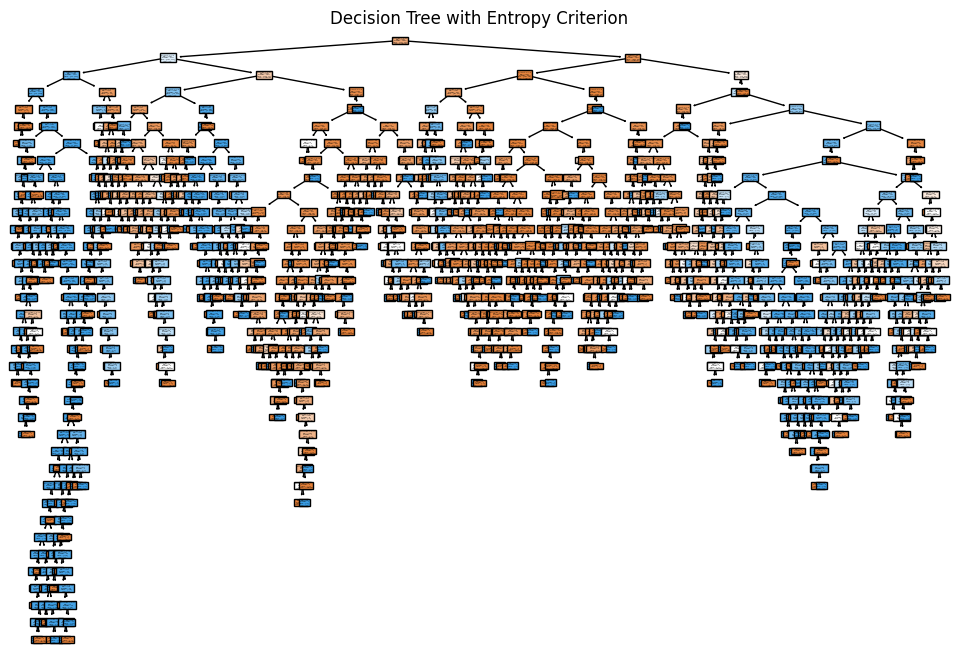

In [20]:
# Plot the decision tree (Entropy criterion)
plt.figure(figsize=(12, 8))
plot_tree(tree_gini, filled=True, feature_names=feature, class_names=['Employed', 'Left'])
plt.title("Decision Tree with Entropy Criterion")
plt.show()

In [21]:
# Evaluate the model on the test set
accuracy_gini = tree_gini.score(X_test, y_test)
print(f"Accuracy (Entropy): {accuracy_gini:.2f}")

Accuracy (Entropy): 0.93


In [22]:
entropy = DecisionTreeClassifier(criterion='entropy', max_depth=None, min_samples_leaf=1)
entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

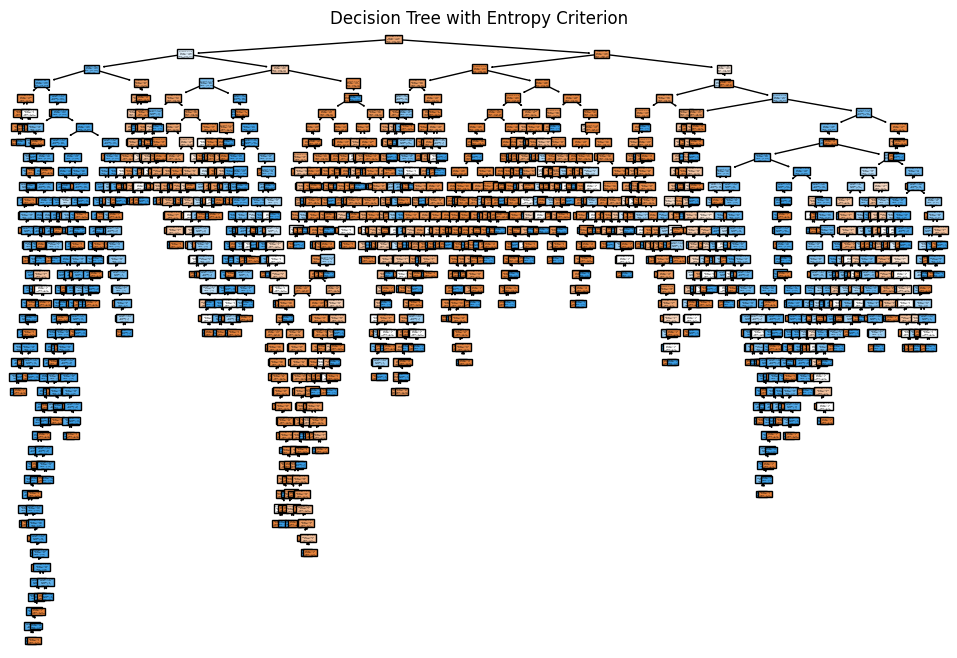

Accuracy (Entropy): 0.93


In [23]:

# Plot the decision tree (Entropy criterion)
plt.figure(figsize=(12, 8))
plot_tree(entropy, filled=True, feature_names=feature, class_names=['Employed', 'Left'])
plt.title("Decision Tree with Entropy Criterion")
plt.show()

# Evaluate the model on the test set
accuracy_entropy = entropy.score(X_test, y_test)
print(f"Accuracy (Entropy): {accuracy_entropy:.2f}")

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
y_pred_gini = tree_gini.predict(X_test)

# Predictions using the pruned Entropy criterion decision tree model
y_pred_entropy = entropy.predict(X_test)

# Evaluation metrics for Gini criterion model
accuracy_gini = accuracy_score(y_test, y_pred_gini)
precision_gini = precision_score(y_test, y_pred_gini, pos_label='Left')
recall_gini = recall_score(y_test, y_pred_gini, pos_label='Left')
f1_score_gini = f1_score(y_test, y_pred_gini, pos_label='Left')

# Evaluation metrics for Entropy criterion model
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
precision_entropy = precision_score(y_test, y_pred_entropy, pos_label='Left')
recall_entropy = recall_score(y_test, y_pred_entropy, pos_label='Left')
f1_score_entropy = f1_score(y_test, y_pred_entropy, pos_label='Left')

In [ ]:
# Confusion matrices for both models
conf_matrix_gini = confusion_matrix(y_test, y_pred_gini, labels=['Employed', 'Left'])
conf_matrix_entropy = confusion_matrix(y_test, y_pred_entropy, labels=['Employed', 'Left'])


In [ ]:
# Create a diverging bar chart to display confusion matrices
def plot_confusion_matrix(conf_matrix, title):
    plt.figure(figsize=(10, 6))
    plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    classes = ['Employed', 'Left']
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    thresh = conf_matrix.max() / 2.
    for i, j in itertools.product(range(conf_matrix.shape[0]), range(conf_matrix.shape[1])):
        plt.text(j, i, format(conf_matrix[i, j], 'd'), horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

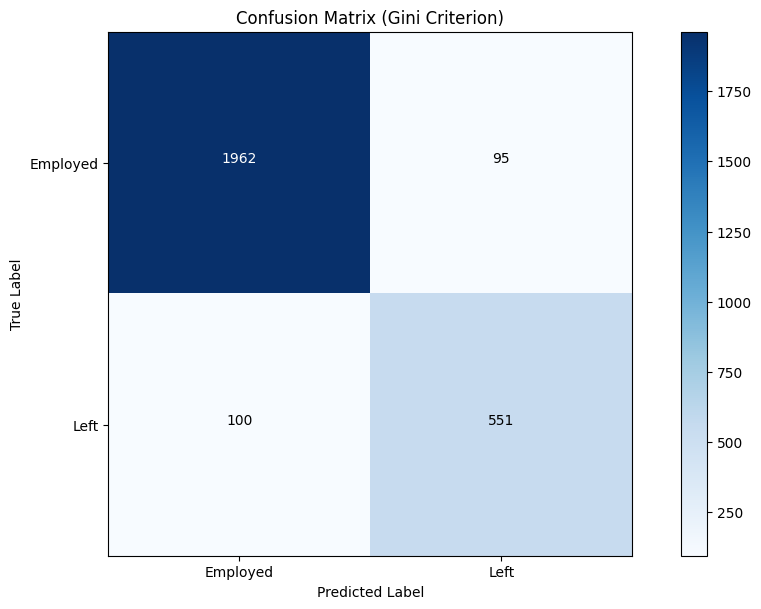

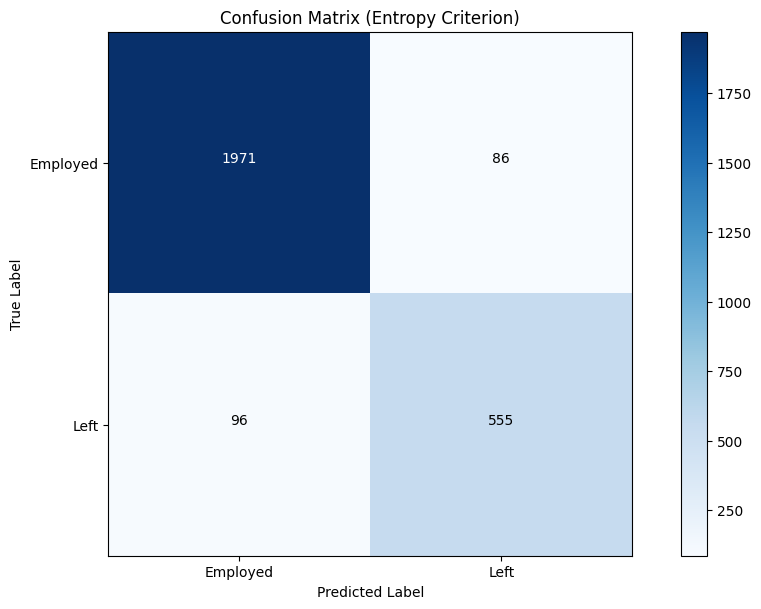

Metrics for Gini Criterion Model:
Accuracy: 0.93
Precision: 0.85
Recall: 0.85
F1-Score: 0.85

Metrics for Entropy Criterion Model:
Accuracy: 0.93
Precision: 0.87
Recall: 0.85
F1-Score: 0.86


In [27]:
import itertools
import numpy as np
plot_confusion_matrix(conf_matrix_gini, 'Confusion Matrix (Gini Criterion)')
plt.show()

plot_confusion_matrix(conf_matrix_entropy, 'Confusion Matrix (Entropy Criterion)')
plt.show()

# Print evaluation metrics
print("Metrics for Gini Criterion Model:")
print(f"Accuracy: {accuracy_gini:.2f}")
print(f"Precision: {precision_gini:.2f}")
print(f"Recall: {recall_gini:.2f}")
print(f"F1-Score: {f1_score_gini:.2f}\n")

print("Metrics for Entropy Criterion Model:")
print(f"Accuracy: {accuracy_entropy:.2f}")
print(f"Precision: {precision_entropy:.2f}")
print(f"Recall: {recall_entropy:.2f}")
print(f"F1-Score: {f1_score_entropy:.2f}")

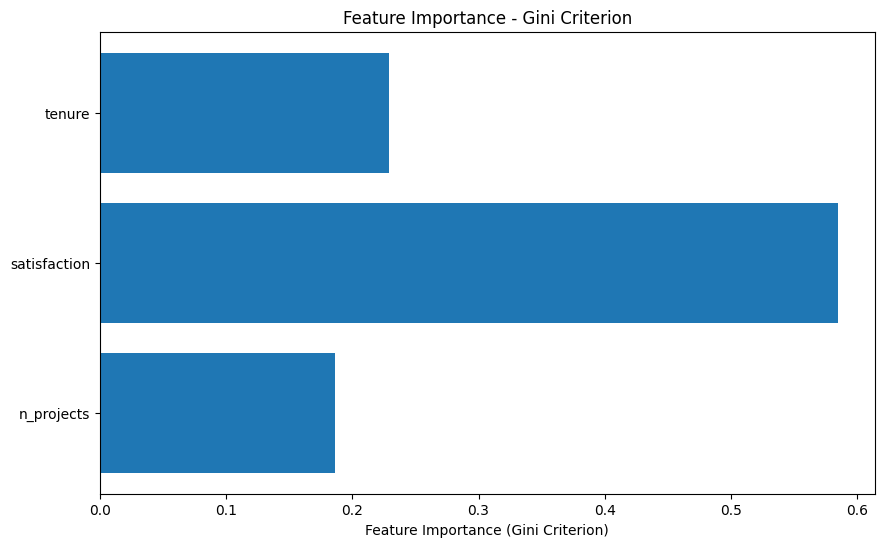

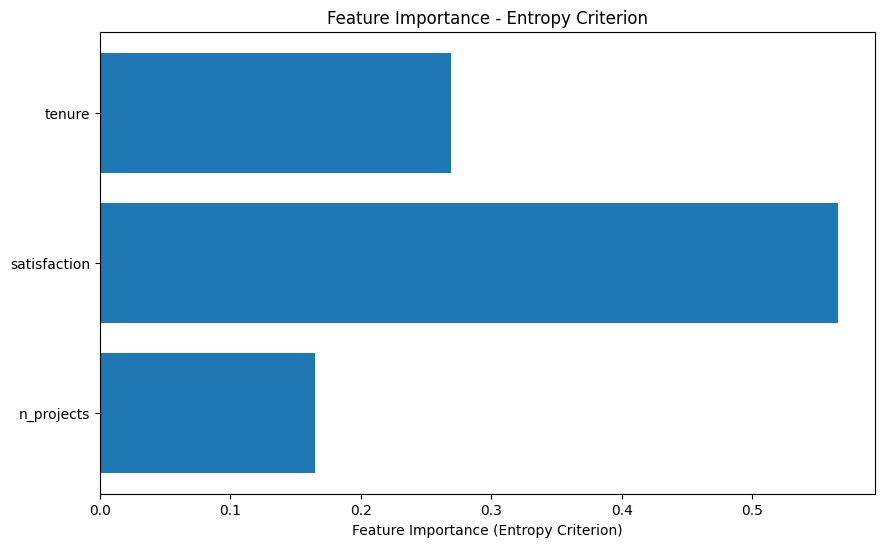

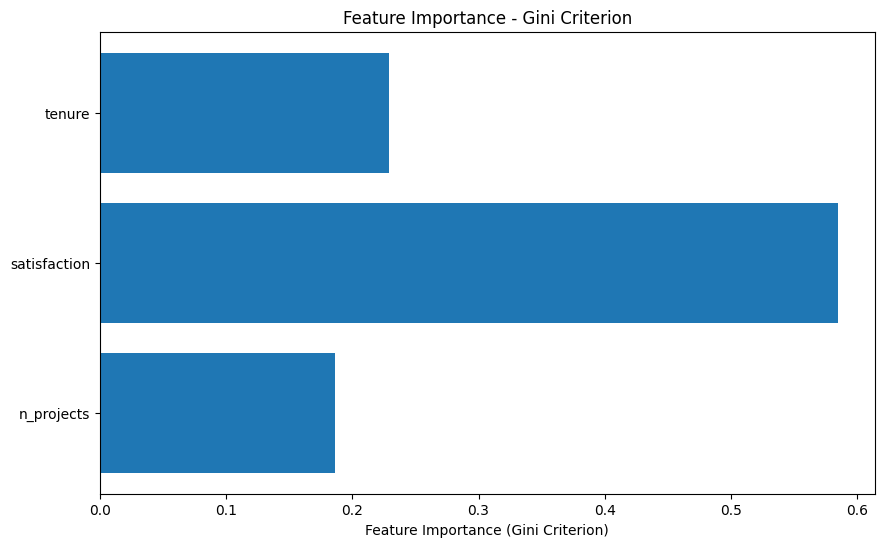

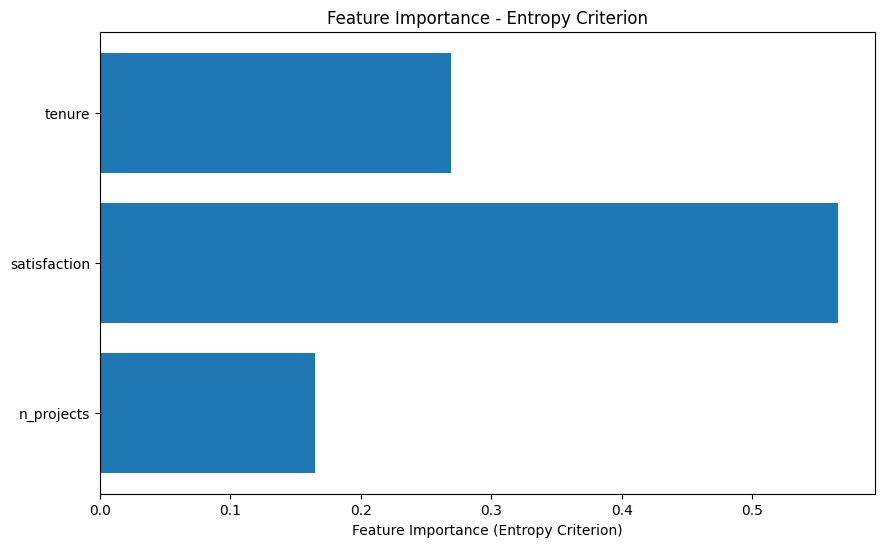

In [28]:


# Get feature importances for Gini criterion model
feature_importance_gini = tree_gini.feature_importances_

# Get feature importances for Entropy criterion model
feature_importance_entropy = entropy.feature_importances_

# List of feature names
feature_names = ['tenure', 'satisfaction', 'n_projects']

# Create a bar chart for Gini criterion
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importance_gini)
plt.xlabel('Feature Importance (Gini Criterion)')
plt.title('Feature Importance - Gini Criterion')
plt.gca().invert_yaxis()  # Invert the y-axis for better visualization
plt.show()

# Create a bar chart for Entropy criterion
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importance_entropy)
plt.xlabel('Feature Importance (Entropy Criterion)')
plt.title('Feature Importance - Entropy Criterion')
plt.gca().invert_yaxis()  # Invert the y-axis for better visualization
plt.show()